# 선형회귀 - y = Wx+b꼴
## y=Wx 꼴과는 다르게 편향값이 추가되어, W를 스칼라가 아닌 벡터로 정의한다.

In [210]:
import matplotlib.pyplot as plt
import numpy as np
import random

x와 y를 랜덤으로 정한다.

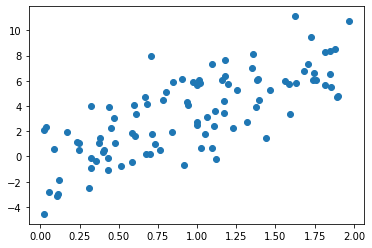

In [274]:
x = 2 * np.random.rand(100, 1)
y_train = 4*x + np.random.randn(100, 1)*2
plt.scatter(x,y_train)
plt.show()

W를 2x1의 랜덤한 벡터로 초기화한다.
이때 W의 0번째 원소는 W의 1번째 원소는 편향이다

In [275]:
W = np.array([[random.random()], [random.random()]])
W.shape

(2, 1)

In [276]:
x

array([[0.71097311],
       [0.2445706 ],
       [0.11360432],
       [1.17306205],
       [0.47280283],
       [0.66977415],
       [0.39987069],
       [0.2482663 ],
       [1.3769706 ],
       [0.60636244],
       [1.37945858],
       [0.97685431],
       [0.59951096],
       [1.84708489],
       [0.42858303],
       [1.46495968],
       [0.02439421],
       [0.99966309],
       [1.72382286],
       [1.58563761],
       [1.87862586],
       [1.38950919],
       [0.68089275],
       [1.81413963],
       [1.15651329],
       [0.58583888],
       [1.63378202],
       [1.0230441 ],
       [0.91720029],
       [1.05169922],
       [0.32169081],
       [1.11354235],
       [1.74614075],
       [1.34891557],
       [0.7024137 ],
       [0.16966912],
       [0.90109582],
       [1.85194744],
       [1.2547731 ],
       [1.01795181],
       [0.02446927],
       [1.32036899],
       [0.60848345],
       [0.11971408],
       [1.81808386],
       [1.43783362],
       [0.381375  ],
       [0.449

In [277]:
x.shape

(100, 1)

In [278]:
np.ones(shape=(100,1)).shape

(100, 1)

x를 가중치 W와 행렬곱하기 편하도록 100x2꼴의 행렬로 바꾼다.
이때 편향값은 1과 곱해지므로 concatenate 명령어로 모든 x의 원소를 \[기존원소, 1]로 바꾼다

In [279]:
x_train = np.concatenate((x, np.ones(shape=(100,1))), -1)

In [280]:
x_train

array([[0.71097311, 1.        ],
       [0.2445706 , 1.        ],
       [0.11360432, 1.        ],
       [1.17306205, 1.        ],
       [0.47280283, 1.        ],
       [0.66977415, 1.        ],
       [0.39987069, 1.        ],
       [0.2482663 , 1.        ],
       [1.3769706 , 1.        ],
       [0.60636244, 1.        ],
       [1.37945858, 1.        ],
       [0.97685431, 1.        ],
       [0.59951096, 1.        ],
       [1.84708489, 1.        ],
       [0.42858303, 1.        ],
       [1.46495968, 1.        ],
       [0.02439421, 1.        ],
       [0.99966309, 1.        ],
       [1.72382286, 1.        ],
       [1.58563761, 1.        ],
       [1.87862586, 1.        ],
       [1.38950919, 1.        ],
       [0.68089275, 1.        ],
       [1.81413963, 1.        ],
       [1.15651329, 1.        ],
       [0.58583888, 1.        ],
       [1.63378202, 1.        ],
       [1.0230441 , 1.        ],
       [0.91720029, 1.        ],
       [1.05169922, 1.        ],
       [0.

In [281]:
y_train

array([[ 1.75231209],
       [ 0.54345789],
       [-2.95752369],
       [ 4.43125493],
       [ 3.03783757],
       [ 4.74409903],
       [ 0.32189938],
       [ 1.0557902 ],
       [ 3.91963771],
       [ 1.66157623],
       [ 6.08269705],
       [ 5.92163302],
       [ 4.09193343],
       [ 6.50999691],
       [-0.0911543 ],
       [ 5.29346641],
       [ 2.07579203],
       [ 2.50660392],
       [ 9.46395708],
       [ 5.73834889],
       [ 8.48746712],
       [ 6.14283462],
       [ 4.20052404],
       [ 8.28935755],
       [ 6.05101331],
       [-0.45325748],
       [ 5.82653958],
       [ 0.65711294],
       [-0.69389682],
       [ 1.77887005],
       [-0.9433423 ],
       [ 3.63565898],
       [ 6.64899403],
       [ 7.01479827],
       [ 0.19393058],
       [ 1.9420113 ],
       [ 6.17616491],
       [ 5.47488845],
       [ 5.24086548],
       [ 5.86759952],
       [-4.55612728],
       [ 2.70985609],
       [ 3.38614029],
       [-1.85954925],
       [ 5.64244942],
       [ 1

MSE 오차함수를 만들고 오차값을 확인한다

In [282]:
def mse(x, y, W):
    return np.mean((y-x@W)**2)

In [283]:
mse(x_train, y_train, W)

13.676287010965567

In [284]:
(y_train-(x_train@W)).shape

(100, 1)

In [285]:
x_train.T.shape

(2, 100)

오차함수의 W에 대한 그래디언트를 구한다. (미분 과정의 자세한 설명은 물어보면 해줄 것)

In [286]:
def differentiated_mse(x, y, W):
    return (-x.T)@(y-x@W) / len(x)

에포크 1000에 Learning Rate는 0.1로 해서 W를 업데이트 한다.

In [287]:
epoch = 1000
lr = 0.1

for i in range(epoch):
    W -= lr*differentiated_mse(x_train, y_train, W)

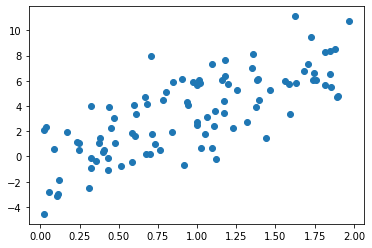

In [288]:
plt.scatter(x, y_train)
plt.show()

그래프를 그려 확인한다.

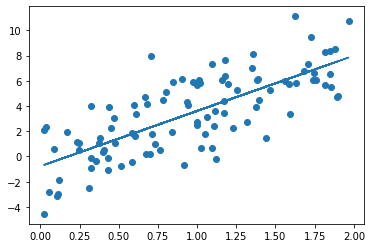

In [289]:
plt.plot(x, x_train@W)
plt.scatter(x, y_train)
plt.show()

W의 값을 확인한다.
이때 W의 0번째 원소는 가중치, 1번째 원소는 편향이다.

In [290]:
W

array([[ 4.3849122 ],
       [-0.77273213]])